# Test GPU availability

In [2]:
import torch
torch.cuda.is_available()

True

# Import libraries

In [3]:
globals().clear
from dotenv import load_dotenv
from os import getenv
import time
import pandas as pd
import numpy
import seaborn as sns
sns.set()
from datetime import datetime
import matplotlib.pyplot as plt

# Load environment variables

In [4]:
load_dotenv()
DB_HOST = getenv('DB_HOST')
DB_USER = getenv('DB_USER')
DB_PASSWORD = getenv('DB_PASSWORD')

# Connect to database hosting the data

In [5]:
from sqlalchemy import create_engine
cnx = create_engine(f'mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:3306/ats_db')

# Load bonds, commodities and index data from database
<!-- **Change the value of the 'indexName' variabe to choose index (case sensitive)**   -->
<!-- >**Options:**  
S&P 500  
NASDAQ Composite  
Dow Jones Industrial Average  
Russell 3000  
FTSE 100   -->

In [6]:
# indexName = 'NASDAQ Composite'
# index = pd.read_sql_query(f'''SELECT hv.date, hv.high, hv.low FROM historical_index_values hv
# JOIN indexes ind ON hv.index_id = ind.id WHERE ind.indexName='{indexName}';''', con=cnx)
index = pd.read_sql_query(f'''SELECT ind.indexName, hv.date, hv.high, hv.low FROM historical_index_values hv
JOIN indexes ind ON hv.index_id = ind.id;''', con=cnx)

commodities = pd.read_sql_query(f'''SELECT c.commodityName, hv.date, hv.high, hv.low FROM historical_commodity_values hv
JOIN commodities c ON hv.commodity_id = c.id;''', con=cnx)

bonds = pd.read_sql_query(f'''SELECT b.treasuryName, bv.date, bv.1_month, bv.2_month, bv.3_month, bv.6_month,
bv.1_year, bv.2_year, bv.3_year, bv.5_year, bv.7_year, bv.10_year, bv.20_year, bv.30_year FROM bond_values bv
JOIN bonds b ON bv.bond_id = b.id;''', con=cnx)
# bonds.head()

# Load stocks data from database
**Add the stock symbols in the 'symbols' list to choose stocks (case sensitive)**  
*[List of stocks](./stocksList.ipynb)*

In [7]:
symbols = ['AAPL','NVDA','MSFT','CSCO','AMZN','GOOGL']
stocks = {}
for symbol in symbols:
    stocks[symbol] = pd.read_sql_query(f'''SELECT c.companyName, hv.date, hv.high, hv.low
    FROM historical_stock_values hv JOIN companies c ON hv.company_id=c.id
    WHERE c.symbol='{symbol}';''', con=cnx)
    stocks[symbol]['date'] = pd.to_datetime(stocks[symbol]['date'], format ='%Y-%m-%d')
# stocks['AAPL'].head()

# Top 10 stocks
top = pd.read_sql_query(f'''SELECT c.symbol FROM historical_stock_values hv JOIN companies c ON hv.company_id=c.id
ORDER BY hv.date DESC, hv.volume DESC LIMIT 10;''', con=cnx)
topStocks = {}
for symbol in top.symbol:
    topStocks[symbol] = pd.read_sql_query(f'''SELECT c.companyName, hv.date, hv.high, hv.volume
    FROM historical_stock_values hv JOIN companies c ON hv.company_id=c.id
    WHERE c.symbol='{symbol}';''', con=cnx)
    topStocks[symbol]['date'] = pd.to_datetime(topStocks[symbol]['date'], format ='%Y-%m-%d')
# topStocks['AAPL'].head()

# Plot indices graph

Text(0.5, 0, 'Date')

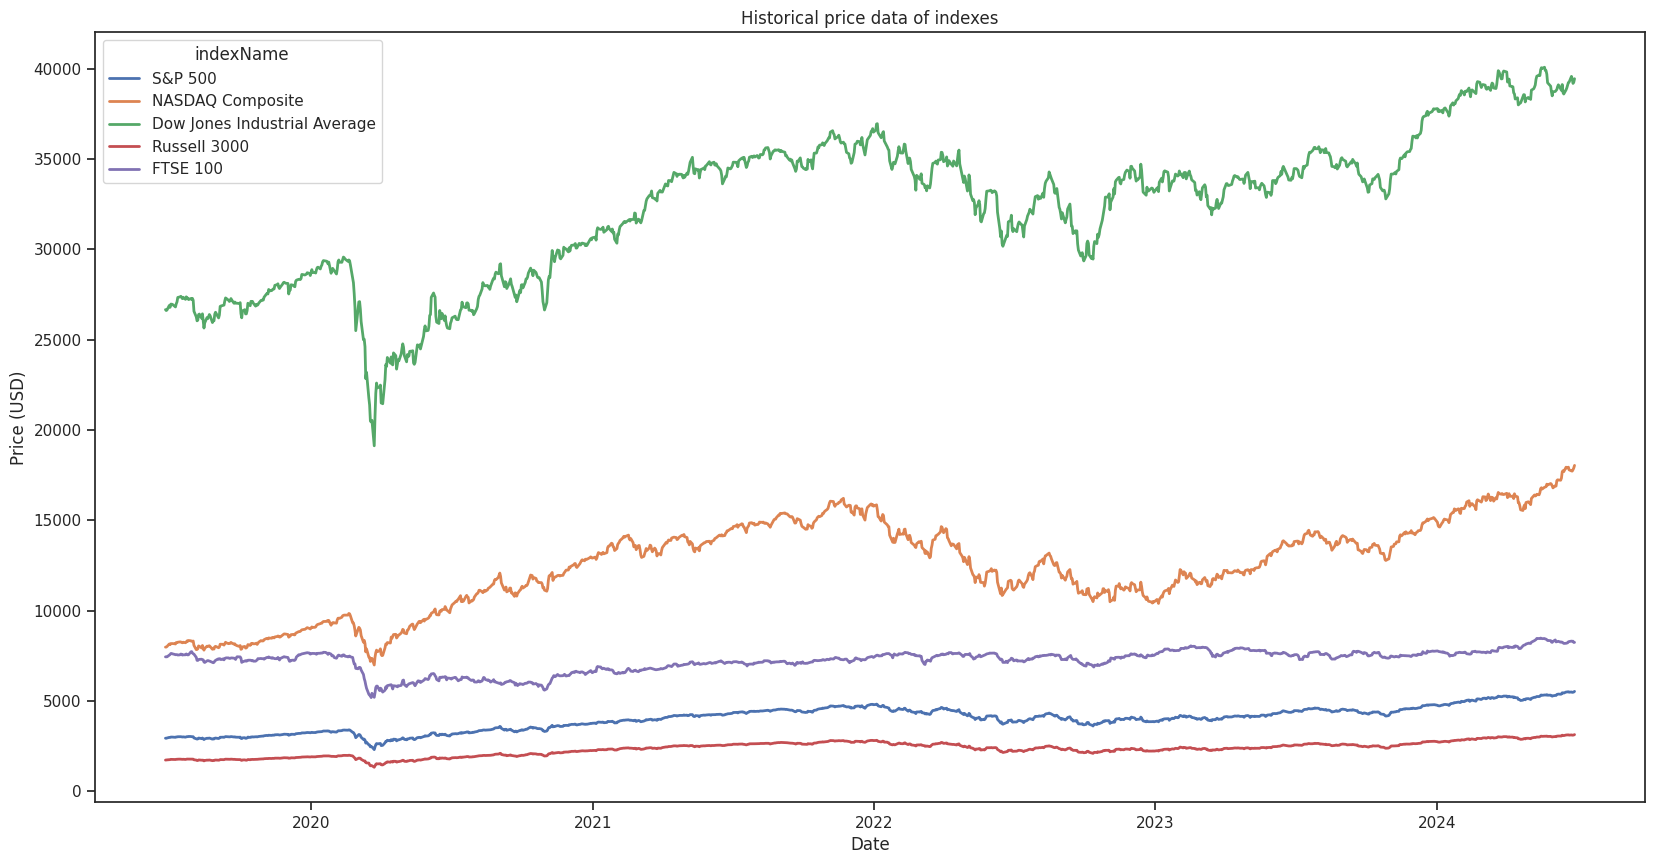

In [8]:
plt.figure(figsize=(20,10))
sns.set(style='ticks')
sns.lineplot(data=index,x='date',y='high', hue='indexName',linewidth=2)
plt.title('Historical price data of indexes')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
# plt.xticks(rotation=90)

# sns.set_theme(style='darkgrid')
# sns.displot(data=index,x='date',y='high', col='indexName', col_wrap=2)

# Plot commodities graph

Text(0.5, 0, 'Date')

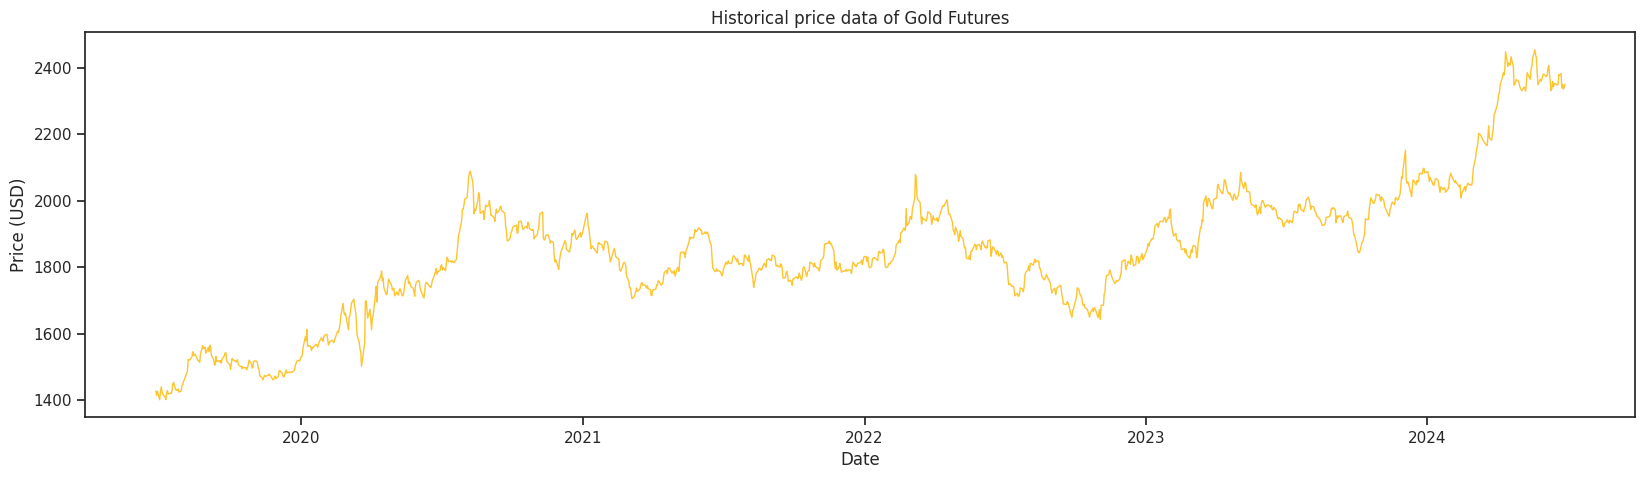

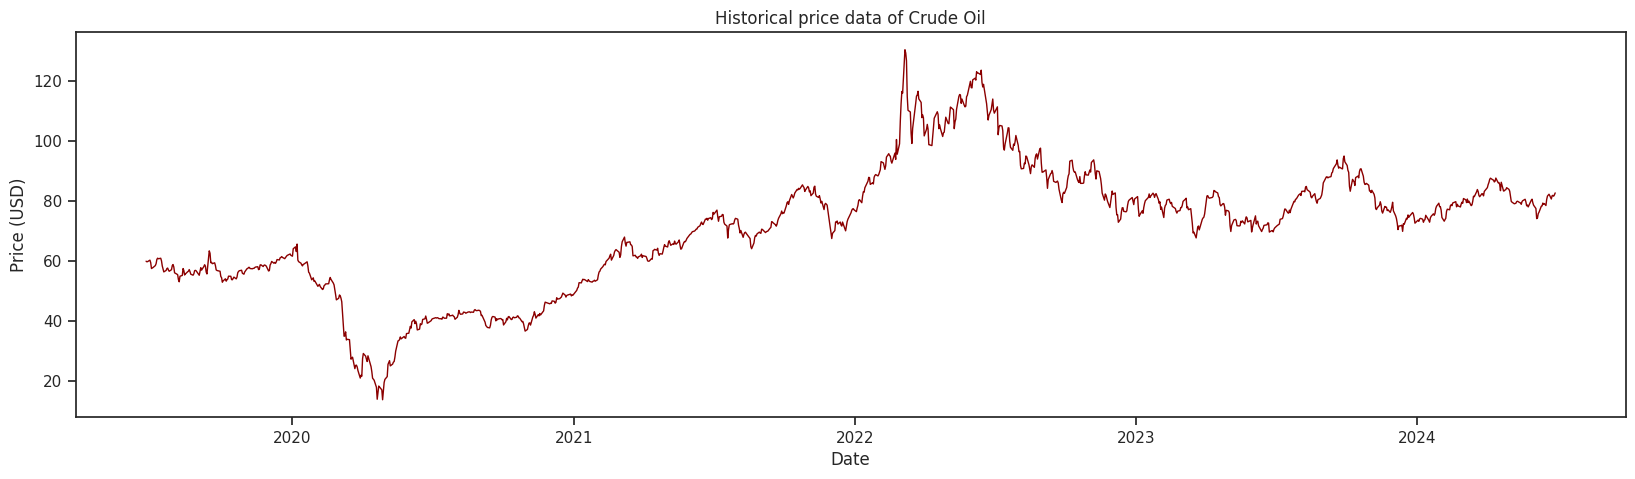

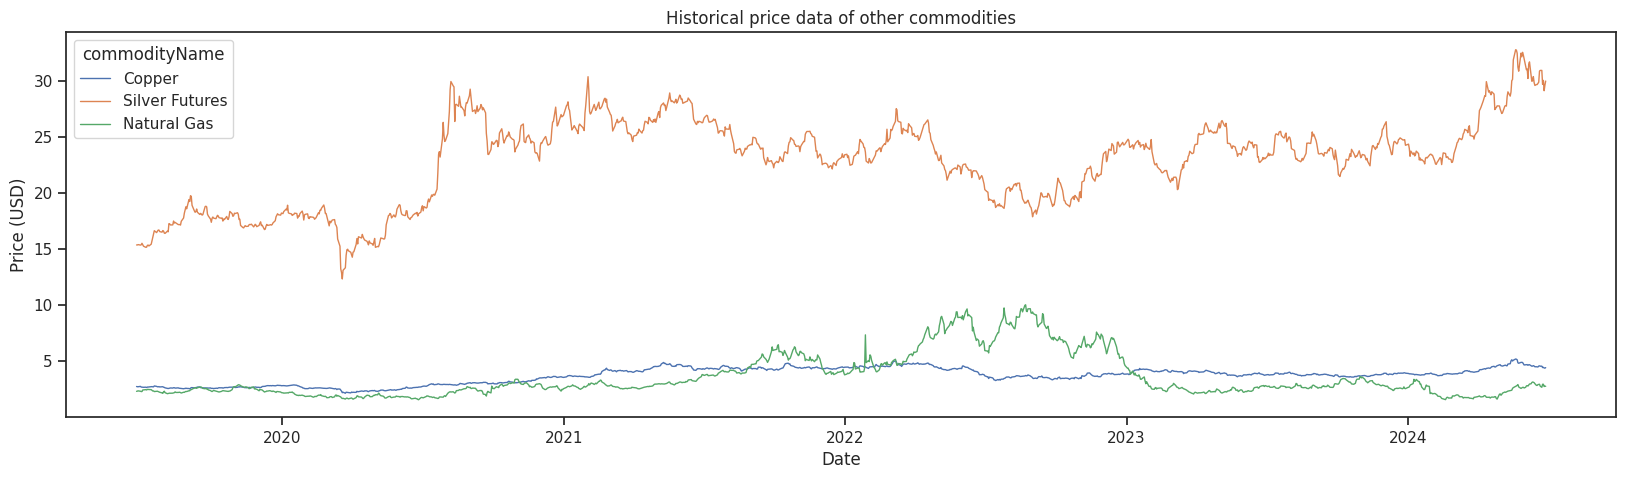

In [22]:
gold_futures = commodities[commodities['commodityName'] == 'Gold Futures']
crude_oil = commodities[commodities['commodityName'] == 'Crude Oil']
other_comm = commodities[~commodities['commodityName'].isin(['Gold Futures', 'Crude Oil'])]
plt.figure(figsize=(20,5))
sns.set(style='ticks')
sns.lineplot(data=gold_futures,x='date',y='high',linewidth=1,color='#ffc42e')
plt.title('Historical price data of Gold Futures')
plt.ylabel('Price (USD)')
plt.xlabel('Date')

plt.figure(figsize=(20,5))
sns.set(style='ticks')
sns.lineplot(data=crude_oil,x='date',y='high',linewidth=1,color='darkred')
plt.title('Historical price data of Crude Oil')
plt.ylabel('Price (USD)')
plt.xlabel('Date')

plt.figure(figsize=(20,5))
sns.set(style='ticks')
sns.lineplot(data=other_comm,x='date',y='high', hue='commodityName', linewidth=1)
plt.title('Historical price data of other commodities')
plt.ylabel('Price (USD)')
plt.xlabel('Date')

# Plot bond graph

Text(0.5, 0, 'Date')

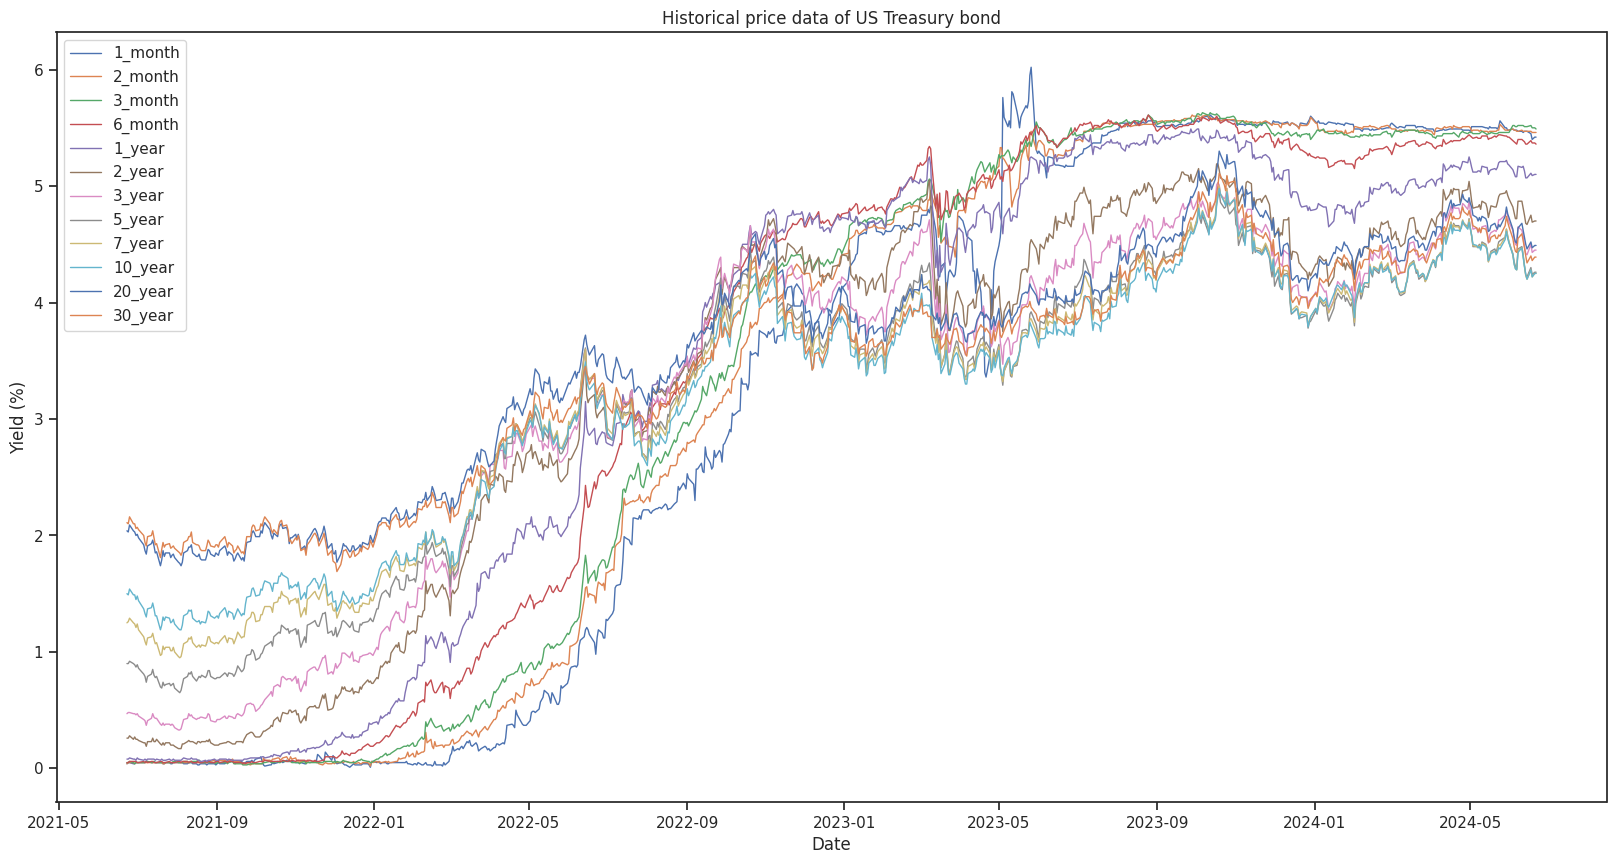

In [136]:
bond_maturityList = bonds.columns.tolist()
bond_maturityList.remove('treasuryName')
bond_maturityList.remove('date')
plt.figure(figsize=(20,10))
sns.set(style='ticks')

for maturity in bond_maturityList:
    sns.lineplot(data=bonds,x='date',y=maturity, label=maturity, linewidth=1)
plt.title('Historical price data of US Treasury bond')
plt.ylabel('Yield (%)')
plt.xlabel('Date')

# Plot Top 10 stocks

Text(0.5, 0, 'Date')

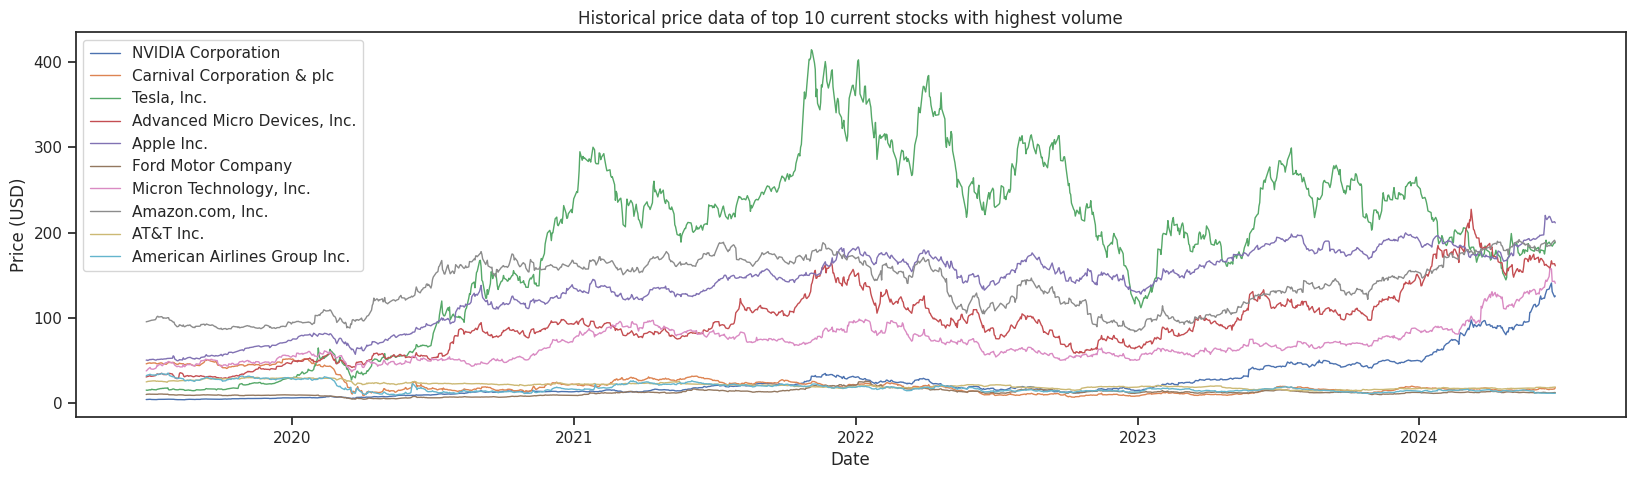

In [137]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
for symbol in topStocks:
    sns.lineplot(data=topStocks[symbol],x='date',y='high',label=topStocks[symbol].companyName[0],linewidth=1)
plt.title('Historical price data of top 10 current stocks with highest volume')
plt.ylabel('Price (USD)')
plt.xlabel('Date')

# Plot selected stocks graphs

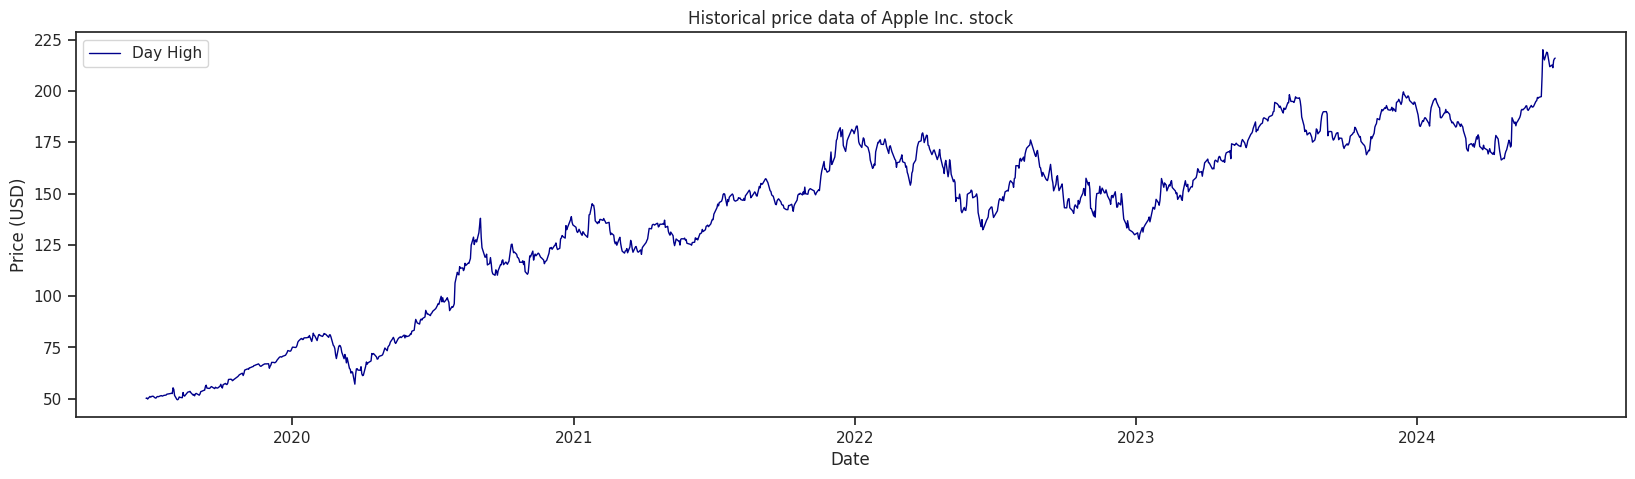

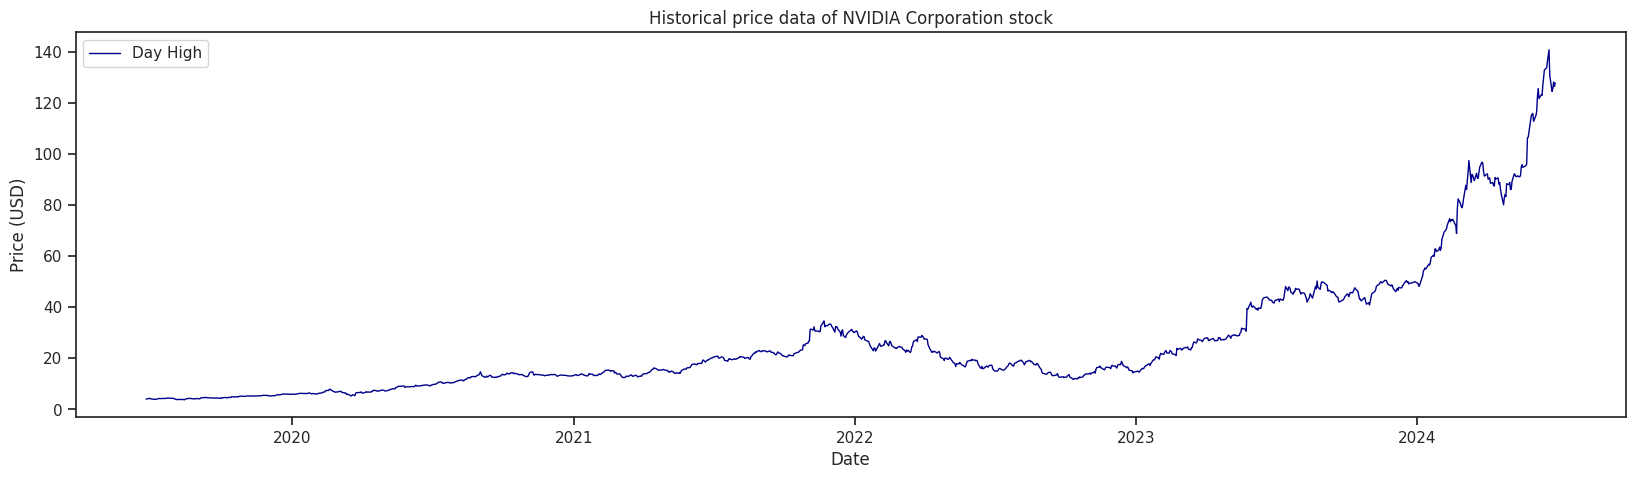

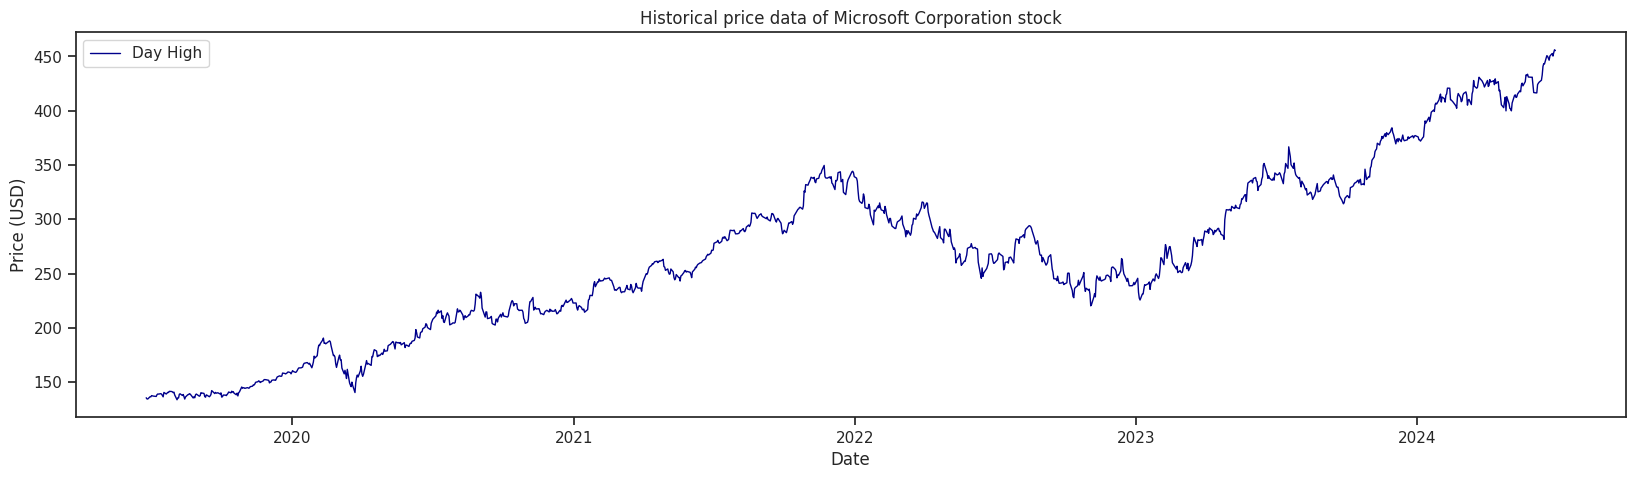

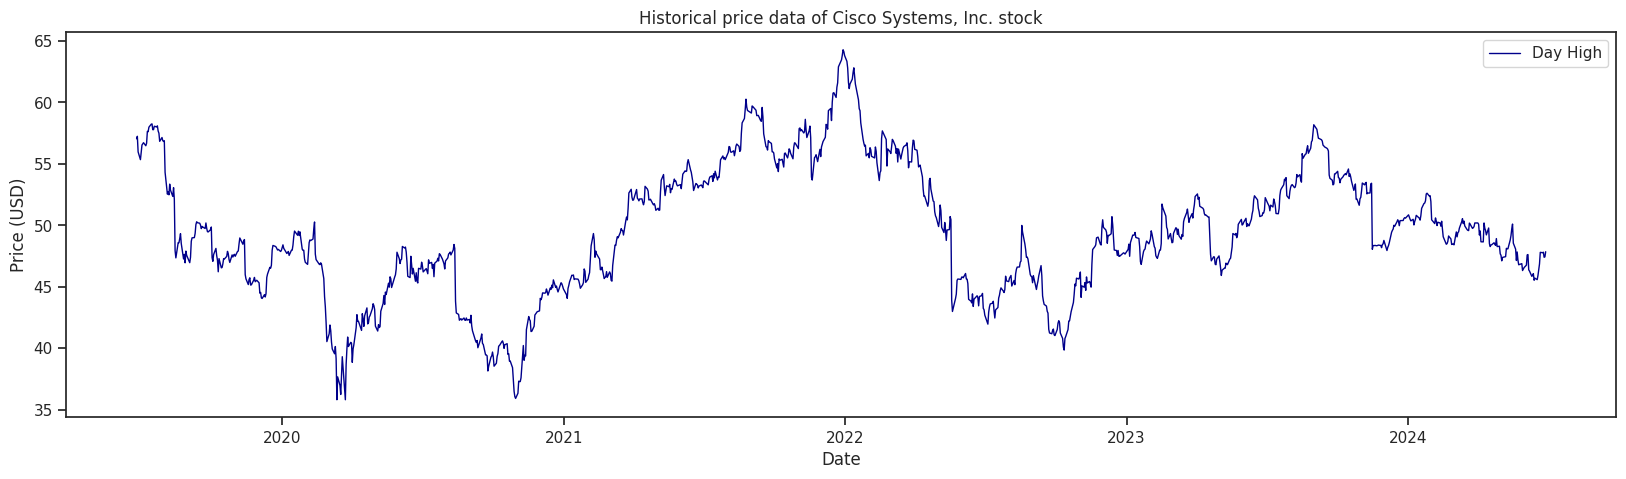

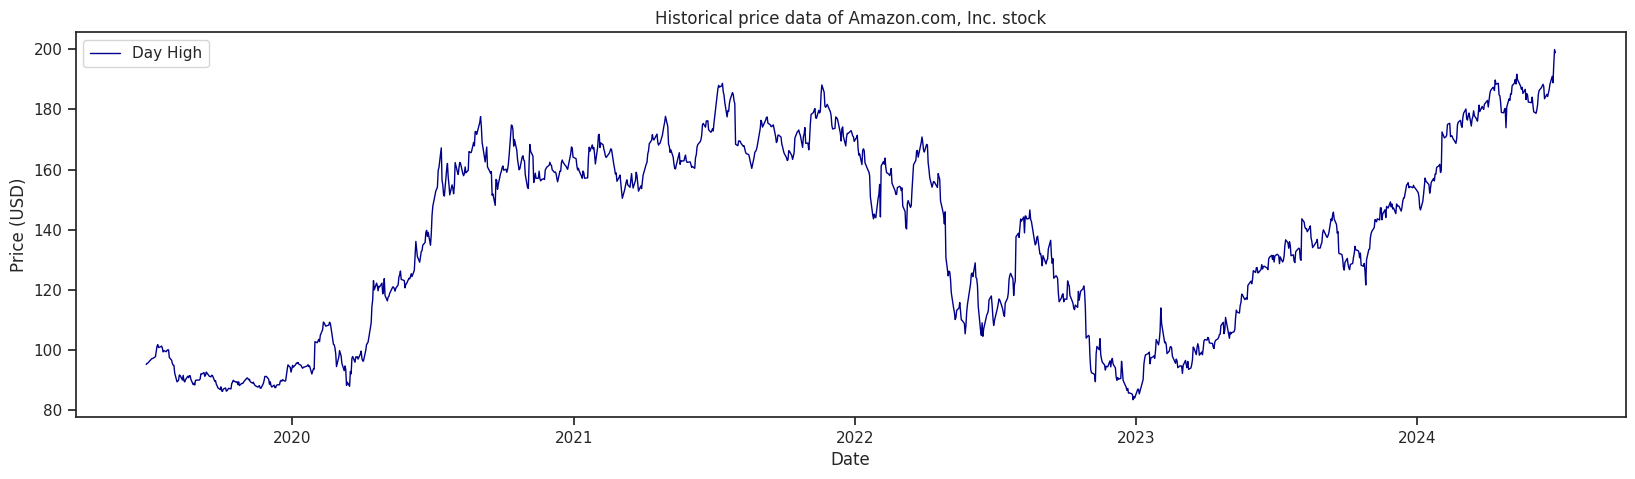

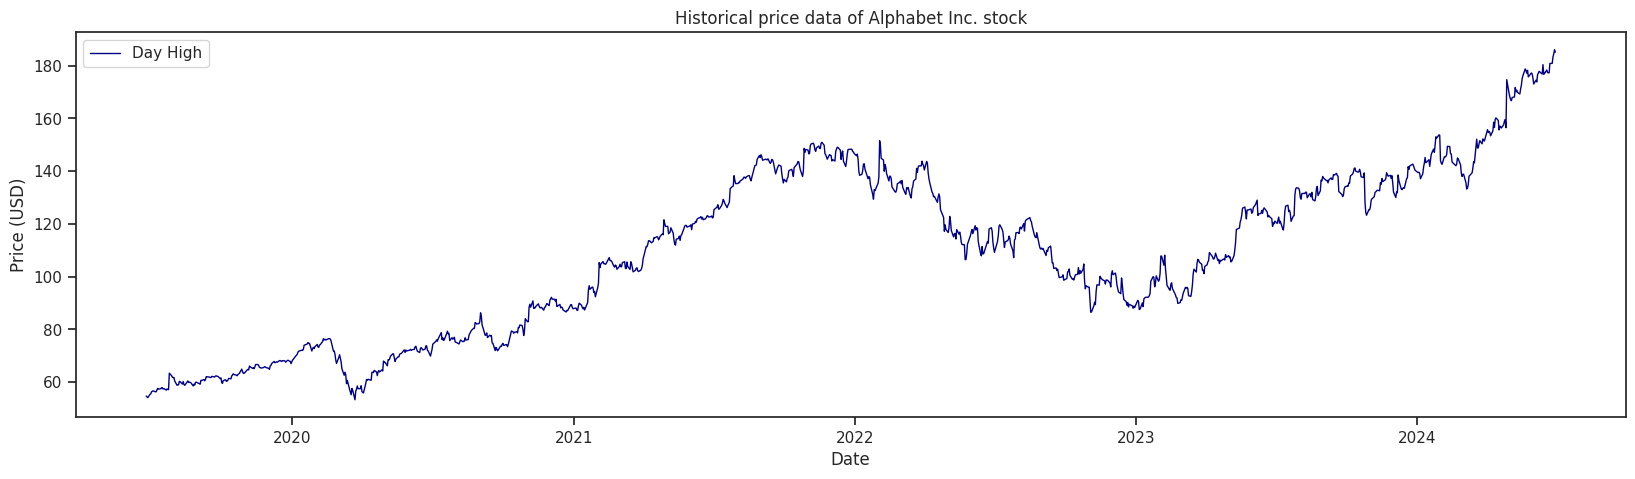

In [25]:
for symbol in stocks.keys():
    plt.figure(figsize=(20,5))
    sns.set(style='ticks')
    sns.lineplot(data=stocks[symbol],x='date',y='high',label=f'Day High',linewidth=1, color='darkblue')
    plt.title(f'Historical price data of {stocks[symbol]["companyName"][0]} stock')
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')  
    